# Example 16 Analysis

We will plot the absorption rate as a function of mass, as well as the reach on $g_{aee}$

## Packages

In [1]:
import numpy as np

# some personal preferences for nice plots
%run "../../utilities/output_parser/plotter.ipynb"

# helpful functions for processing output
import sys
sys.path.append("../../utilities/output_parser")
import EXDMDataHandler
from EXDMDataHandler import EXDMData

## Data

In [4]:
data = EXDMData(filename = './output/EXDM_out_example_16.hdf5')
ripped_filename = './Xe_event_rate_pe.csv'

## Results

### Rate

In [5]:
def get_ripped_data(filename, col):
    data = []
    with open(filename) as f:
        for line in f:
            if not line.startswith('S'):
                try:
                    data.append(float(line.split(',')[col]))
                except:
                    pass
                
    return np.array(data)

rescaled_rate_masses_log_keV = get_ripped_data(ripped_filename, 0)
rescaled_rate = get_ripped_data(ripped_filename, 1)

In [6]:
[ masses_eV, abs_rate ] = data.get_absorption_rates(g2=(10**(-12))**2, expt_T_year=1/365)

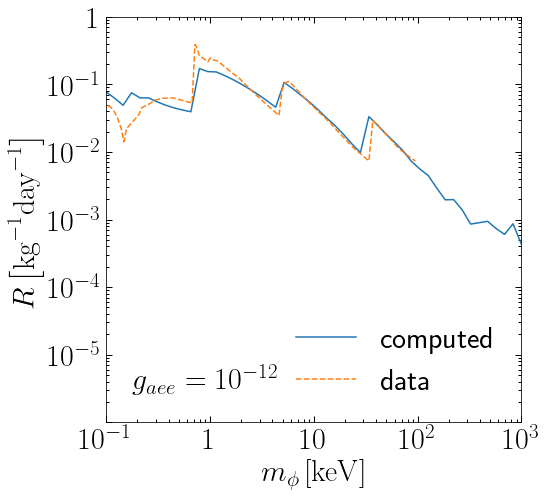

In [8]:
save_fig = True

fig, axes = plt.subplots(nrows=1, ncols=1, 
                             figsize=(7*1.1, 7))

log_mX_min = 2 - 3
log_mX_max = 6 - 3

log_events_min = -6
log_events_max = 0

set_custom_tick_options(axes)
set_custom_axes(axes, 'x', log_mX_min, log_mX_max,
               ax_type = 'log', 
               label = r'$m_\phi \, [\mathrm{keV}]$')
set_custom_axes(axes, 'y', log_events_min, log_events_max,
               ax_type = 'log', 
               label = r'$R \left[ \mathrm{kg}^{-1} \mathrm{day}^{-1} \right]$', 
               show_first = False)

axes.plot(
    np.log10(masses_eV/10**3), 
    np.log10(abs_rate),
    label = 'computed'
)

axes.plot(
    rescaled_rate_masses_log_keV, 
    np.log10((0.4/0.3)*rescaled_rate),
    linestyle = '--',
    label = 'data'
)

axes.legend(loc = 'lower right', fontsize = 30, frameon = False)

fig.tight_layout()
 
axes.text(-0.75, -5.5, r'$g_{aee} = 10^{-12}$', fontsize = 30)
    
if save_fig:
    plt.savefig('./output/Xe_ps_rate_compare.pdf', 
                bbox_inches='tight', pad_inches = 0.075)

plt.show()

### Reach

In [9]:
[ masses_eV, g_constraint ] = data.get_abs_g_constraint()

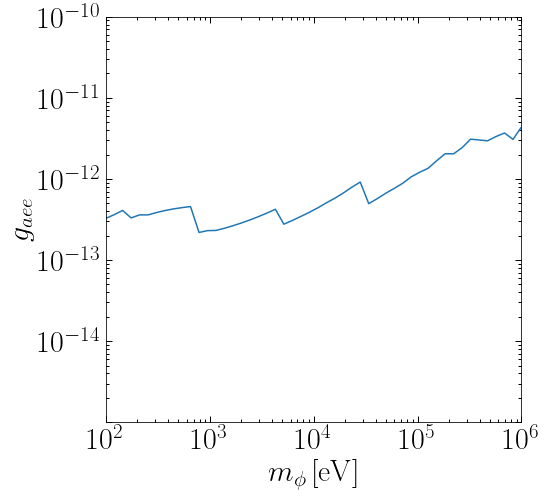

In [10]:
save_fig = True

fig, axes = plt.subplots(nrows=1, ncols=1, 
                             figsize=(7*1.1, 7))

log_mX_min = 2
log_mX_max = 6

log_g_min = -15
log_g_max = -10

set_custom_tick_options(axes)
set_custom_axes(axes, 'x', log_mX_min, log_mX_max,
               ax_type = 'log', 
               label = r'$m_\phi \, [\mathrm{eV}]$')
set_custom_axes(axes, 'y', log_g_min, log_g_max,
               ax_type = 'log', 
               label = r'$g_{a ee}$', 
               show_first = False)

axes.plot(
    np.log10(masses_eV), 
    np.log10(g_constraint),
)

fig.tight_layout()
    
if save_fig:
    plt.savefig('./output/Xe_gaee_constraint.pdf', 
                bbox_inches='tight', pad_inches = 0.075)

plt.show()